In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from matplotlib import style 
style.use('default')

In [27]:
import sys
sys.path.append('../')

Table of contents:
* [Correlation](#Correlation)
* [Desciptives for Data](#Desciptives-for-Data)

## Read Data

In [28]:
# the news articles
articles = pd.read_csv("../data/articles_adobe_AMT.csv")

# dev and train data
data_train = pd.read_csv("../data/messages_train_ready_for_WS.tsv", sep='\t')
labels_dev = pd.read_csv("../data/goldstandard_dev_2022.tsv", sep='\t', header=None)
features_dev = pd.read_csv("../data/messages_dev_features_ready_for_WS_2022.tsv", sep='\t')

# sentencized automatic emotion tags
sent_emotion_train = pd.read_csv("../data/messages_train_sentencized_automatic_emotion_tags.tsv", sep='\t')
sent_emotion_dev = pd.read_csv("../data/messages_dev_sentencized_automatic_emotion_tags.tsv", sep='\t')

## Correlation

### Article length and empathy / empathy_bin / distress / distress_bin
I could not find strong colinearity here.

In [29]:
article_len = articles
article_len['article_len'] = articles['text'].apply(lambda x: len(x))
article_len = article_len.drop(columns='text')

# join article length on training data
joined = data_train.join(article_len.set_index('article_id'), on='article_id')

In [30]:
r, p = pearsonr(joined['empathy'], joined['article_len'])
print('\n article_len and empathy \n r: {:.4f} \n p: {:.4f}'.format(r, p))

r, p = pearsonr(joined['empathy_bin'], joined['article_len'])
print('\n article_len and empathy_bin \n r: {:.4f} \n p: {:.4f}'.format(r, p))

r, p = pearsonr(joined['distress'], joined['article_len'])
print('\n article_len and distress \n r: {:.4f} \n p: {:.4f}'.format(r, p))

r, p = pearsonr(joined['distress_bin'], joined['article_len'])
print('\n article_len and distress_bin \n r: {:.4f} \n p: {:.4f}'.format(r, p))


 article_len and empathy 
 r: 0.0585 
 p: 0.0117

 article_len and empathy_bin 
 r: 0.0362 
 p: 0.1187

 article_len and distress 
 r: 0.0117 
 p: 0.6127

 article_len and distress_bin 
 r: -0.0042 
 p: 0.8555


### Correlate all variables

In [31]:
thresh = 0 # 0.3  # threshold to highlight correlations, set to 0 means looking at all data points
corr_table = joined.corr()
corr_table.where(np.abs(corr_table) >= thresh, '-')

,article_id,empathy,distress,empathy_bin,distress_bin,gender,education,race,age,income,personality_conscientiousness,personality_openess,personality_extraversion,personality_agreeableness,personality_stability,iri_perspective_taking,iri_personal_distress,iri_fantasy,iri_empathatic_concern,article_len
article_id,1.000000,-0.071446,-0.043832,-0.061149,-0.056913,0.003490,0.008771,0.002713,0.007232,-0.001582,0.005489,-0.002385,-0.003105,0.002652,0.004745,0.001948,-0.001097,0.004555,0.004752,-0.005292
empathy,-0.071446,1.000000,0.450938,0.846136,0.378659,-0.007664,0.031074,-0.038457,0.020449,0.039843,0.092631,0.113773,0.209026,0.243257,0.103789,0.228567,0.005806,0.161712,0.299363,0.058454
distress,-0.043832,0.450938,1.000000,0.382185,0.860048,0.024215,0.010807,-0.000424,-0.070702,0.041441,-0.051531,0.014208,0.124056,0.126590,-0.083779,0.126524,0.189525,0.120541,0.198645,0.011747
empathy_bin,-0.061149,0.846136,0.382185,1.000000,0.362133,-0.004270,0.041939,-0.069142,0.033600,0.037180,0.079414,0.082557,0.170608,0.189598,0.088894,0.203973,-0.007286,0.131431,0.235817,0.036188
distress_bin,-0.056913,0.378659,0.860048,0.362133,1.000000,0.002105,0.029108,-0.017707,-0.048650,0.052864,-0.069896,-0.002354,0.086334,0.076117,-0.065330,0.092243,0.155334,0.059610,0.130349,-0.004224
gender,0.003490,-0.007664,0.024215,-0.004270,0.002105,1.000000,0.051082,-0.060733,0.081864,-0.087876,0.036793,0.069886,-0.034731,0.197429,-0.127292,0.120141,0.087273,0.127233,0.178487,0.015225
education,0.008771,0.031074,0.010807,0.041939,0.029108,0.051082,1.000000,0.088546,0.065076,0.059008,0.009809,-0.010270,0.029116,-0.080744,0.060013,-0.088081,-0.104121,-0.063667,-0.102738,-0.000024
race,0.002713,-0.038457,-0.000424,-0.069142,-0.017707,-0.060733,0.088546,1.000000,-0.199783,0.112910,-0.106012,-0.060725,-0.005207,-0.113082,-0.012554,-0.035845,0.026251,-0.039264,-0.055293,-0.009681
age,0.007232,0.020449,-0.070702,0.033600,-0.048650,0.081864,0.065076,-0.199783,1.000000,-0.009432,0.176768,0.057152,0.035706,0.146206,0.124038,-0.008763,-0.190480,0.032384,0.085886,0.029884
income,-0.001582,0.039843,0.041441,0.037180,0.052864,-0.087876,0.059008,0.112910,-0.009432,1.000000,0.087644,-0.065265,0.031740,0.004696,0.054204,-0.021955,0.030854,-0.052580,-0.023561,0.009179


## Desciptives for Data

In [32]:
print('Training data shape:', data_train.shape[0])
print('Dev data shape:', features_dev.shape[0])

Training data shape: 1860
Dev data shape: 270


### Mean

In [33]:
data_train.drop(columns=['article_id', 'gender','education', 'race']).mean()

/var/folders/kx/k45gj1_52ns5bsbjyn403cs00000gn/T/ipykernel_17563/4117380871.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_train.drop(columns=['article_id', 'gender','education', 'race']).mean()


empathy                              3.699916
distress                             3.731116
empathy_bin                          0.492473
distress_bin                         0.486559
age                                 35.317204
income                           57874.973118
personality_conscientiousness        5.555108
personality_openess                  5.201613
personality_extraversion             3.819892
personality_agreeableness            5.352151
personality_stability                4.950269
iri_perspective_taking               3.781879
iri_personal_distress                2.584892
iri_fantasy                          3.504594
iri_empathatic_concern               3.772634
dtype: float64

### Standard deviation

In [34]:
data_train.drop(columns=['article_id', 'gender','education', 'race']).std()

/var/folders/kx/k45gj1_52ns5bsbjyn403cs00000gn/T/ipykernel_17563/2116255607.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_train.drop(columns=['article_id', 'gender','education', 'race']).std()


empathy                              1.825406
distress                             1.891517
empathy_bin                          0.500078
distress_bin                         0.499954
age                                 10.130744
income                           64680.056724
personality_conscientiousness        1.314176
personality_openess                  1.352760
personality_extraversion             1.875590
personality_agreeableness            1.375424
personality_stability                1.622139
iri_perspective_taking               0.786226
iri_personal_distress                0.934901
iri_fantasy                          0.841145
iri_empathatic_concern               0.927051
dtype: float64

### Median

In [35]:
data_train.drop(columns=['article_id', 'gender','education', 'race']).median()

/var/folders/kx/k45gj1_52ns5bsbjyn403cs00000gn/T/ipykernel_17563/778282504.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_train.drop(columns=['article_id', 'gender','education', 'race']).median()


empathy                              3.833
distress                             3.875
empathy_bin                          0.000
distress_bin                         0.000
age                                 33.000
income                           50000.000
personality_conscientiousness        6.000
personality_openess                  5.500
personality_extraversion             4.000
personality_agreeableness            5.500
personality_stability                5.500
iri_perspective_taking               3.857
iri_personal_distress                2.571
iri_fantasy                          3.571
iri_empathatic_concern               3.857
dtype: float64

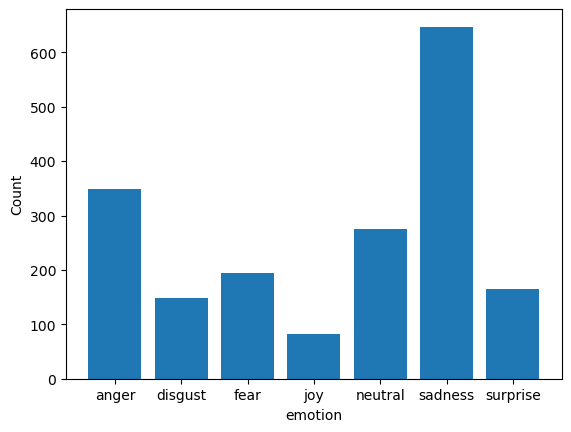

In [54]:
emotion_count = data_train.groupby('emotion').size()
emotion_labels = emotion_count.index.to_list()
plt.bar(range(len(emotion_count)), emotion_count)
plt.xticks(range(len(emotion_labels)), emotion_labels)
plt.xlabel('emotion')
plt.ylabel('Count')
plt.show()


In [37]:
data_train.groupby('emotion').mean()[['empathy', 'distress', 'empathy_bin', 'distress_bin']]

,empathy,distress,empathy_bin,distress_bin
emotion,,,,
anger,3.053971,3.646132,0.346705,0.461318
disgust,3.363530,4.077181,0.409396,0.563758
fear,3.480253,3.802191,0.422680,0.489691
joy,4.044683,2.987805,0.573171,0.317073
neutral,3.638796,3.481364,0.498182,0.447273
sadness,4.280535,4.018547,0.627512,0.545595
surprise,3.279470,3.169970,0.378049,0.384146
